# **DATA UNDERSTANDING**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
%matplotlib inline


In [5]:
files.upload()

Saving application_data.csv to application_data.csv


In [8]:
files.upload()

Saving previous_application.csv to previous_application.csv


KEY POINTS

1> Firstly we have imported all tool which are going t be used.

2> After that csv file is uploaded.

In [6]:
app_data=pd.read_csv('application_data.csv')


In [9]:
pre_app_data=pd.read_csv('previous_application.csv')

In [10]:
print(app_data.shape)
print(pre_app_data.shape)

(307511, 122)
(1670214, 37)


## KEY POINTS 

* We have two csv files:
     
     a)"application_data"

     b)"previous_application"

* And its shape are (307511,122) and (1670214,37)


# **Data Cleaning and Manipulation**

In [11]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
pre_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Key points

* Here we are going to remove the column which have 40% nan values in it.

* After that we will do the analysis.

* New file is made of name new_app_data

In [13]:
perc=40.0
min_count =  int(((100-perc)/100)*app_data.shape[0] + 1)
new_app_data = app_data.dropna( axis=1, 
                thresh=min_count)
print(new_app_data)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [14]:
new_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
new_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [16]:
new_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [17]:
perc=40.0
min_count =  int(((100-perc)/100)*pre_app_data.shape[0] + 1)
new_pre_app_data = pre_app_data.dropna( axis=1, 
                thresh=min_count)
print(new_pre_app_data)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0

In [18]:
new_pre_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [19]:
new_pre_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [20]:
new_pre_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


**Key points**

* As we have negative value in some columns so we have to remove all the negative value.

* Error value correction is done in both new_app_data and new_pre_app_data.

In [ ]:
# First we will remove negative value from new_app_data:

In [21]:
negative_new_app_data=[col for col in new_app_data if col.startswith('DAYS')]
negative_new_app_data

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [22]:
positive_new_app_data=new_app_data.copy()
positive_new_app_data[negative_new_app_data]=abs(positive_new_app_data[negative_new_app_data])
positive_new_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
# Now we will remove negative value of new_pre_app_data

In [23]:
negative_new_pre_app_data=[col for col in new_pre_app_data if col.startswith('DAYS')]
negative_new_pre_app_data

['DAYS_DECISION']

In [24]:
positive_new_pre_app_data=new_pre_app_data.copy()
positive_new_pre_app_data[negative_new_pre_app_data]=abs(positive_new_pre_app_data[negative_new_pre_app_data])
positive_new_pre_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,2.800000e+02,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,1.300000e+03,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,2.922000e+03,4.000000e+06,8.400000e+01


**Key points**

* In the new_app_data we have  ['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE'] columns which have negative value or error.

* I the new_pre_app_data we have only one ['DAYS_DECISION'] column which have negative or error.

* From both the data error are removed and we have two data which is now ready for analysis.

In [25]:
final_app_data=positive_new_app_data.copy()
final_pre_data=positive_new_pre_app_data.copy()

# **DATA ANALYSIS**

>>**Firstly analysing final_app_data**

In [26]:
final_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## key points

* In this we are going to analyse final_app_data and get some information about the data abailable.

* Firstly we will analyse the float after that int and then object.



In [27]:
# CNT_FAM_MEMBERS

final_app_data['CNT_FAM_MEMBERS'].describe()


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

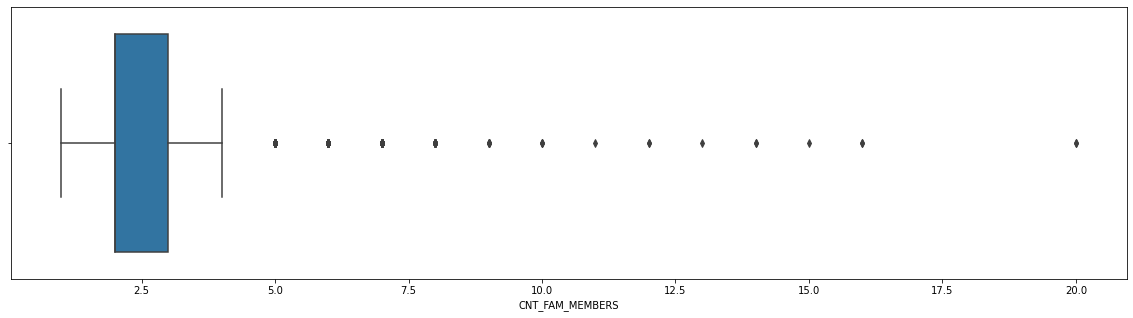

In [28]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['CNT_FAM_MEMBERS'])
plt.show()

**key points**

* mean and median of CNT_FAM_MEMBERS are 2.14 and 1.
*so we will conside lower value.


In [29]:
# ATM_ANNUITY

final_app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

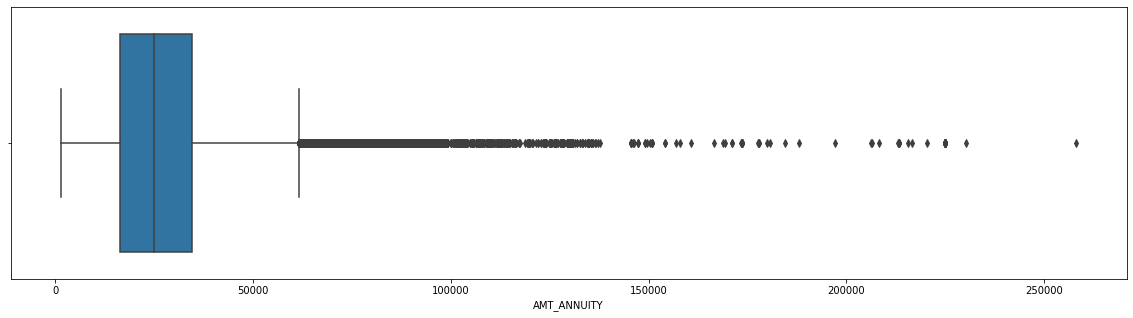

In [30]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_ANNUITY'])
plt.show()

**key points**

* mean and median of AMT_ANNUITY is 27108 and 1615.
* so we will consider median value.

In [31]:
# ATM_CREDIT

final_app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

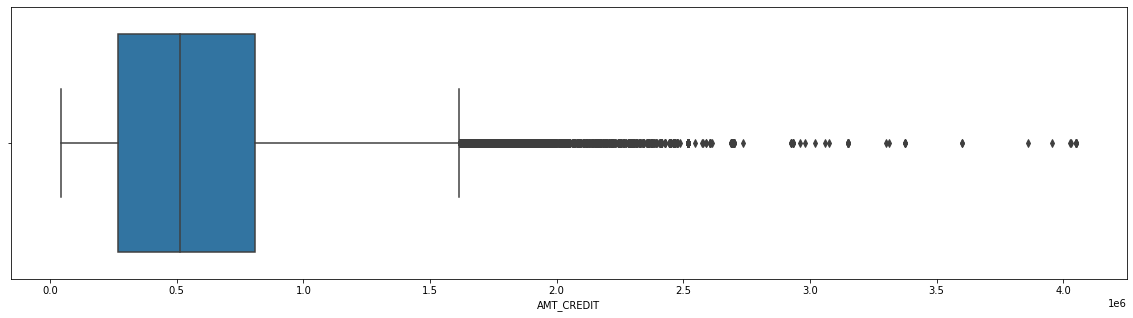

In [32]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_CREDIT'])
plt.show()

**key points**

* mean and median of AMT_CREDIT is 5.99 and 4.5.

* so median value will be considered.

In [33]:
# AMT_INCOME_TOTAL

final_app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

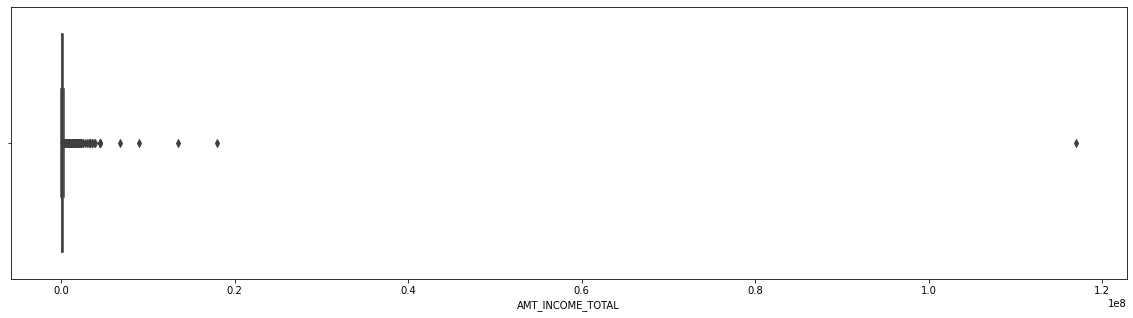

In [34]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_INCOME_TOTAL'])
plt.show()

In [35]:
# AMT_REQ_CREDIT_BUREAU_MON

final_app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

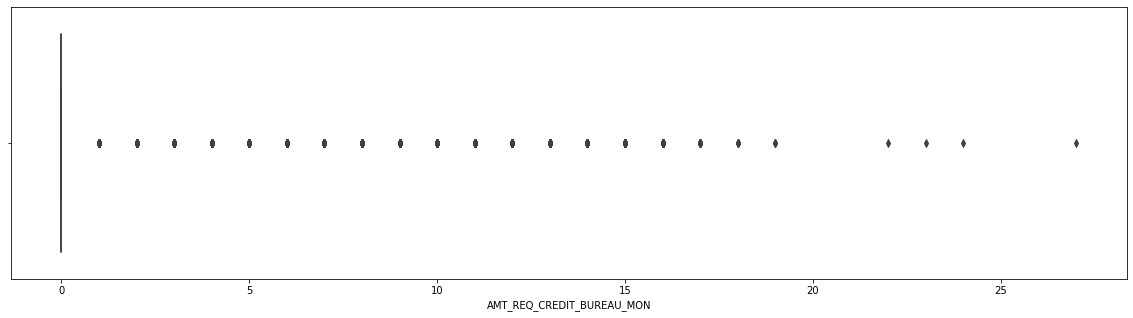

In [36]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [37]:
# AMT_REQ_CREDIT_BUREAU_QRT

final_app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

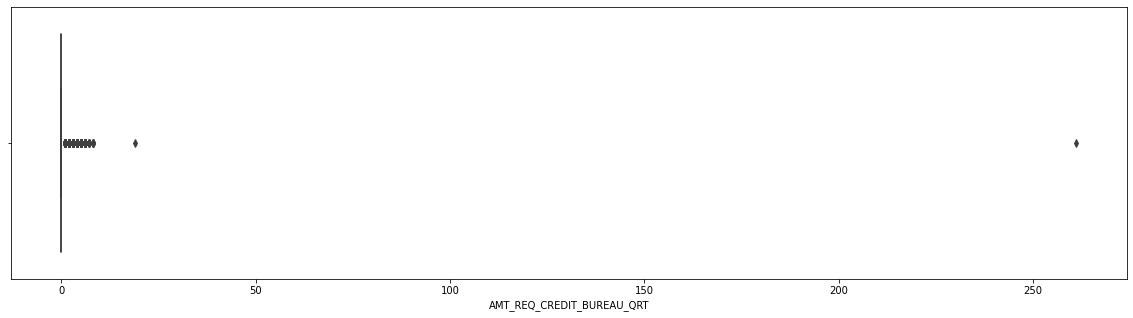

In [38]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [39]:
# AMT_REQ_CREDIT_BUREAU_YEAR

final_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

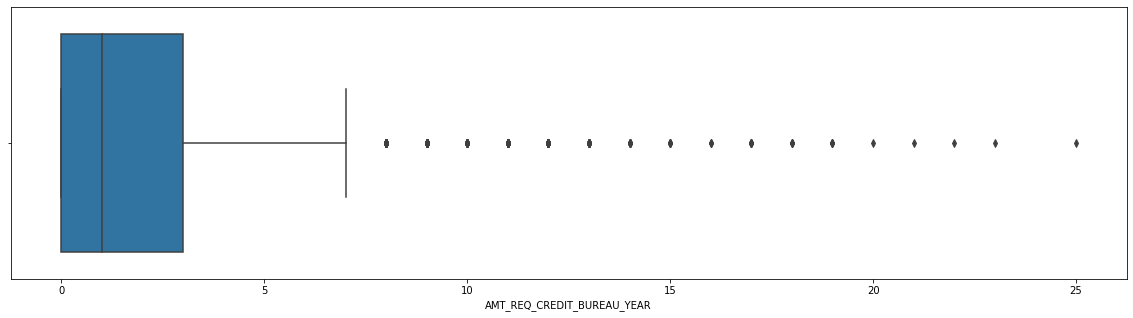

In [40]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.show()

In [41]:
# AMT_GOODS_PRICE

final_app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

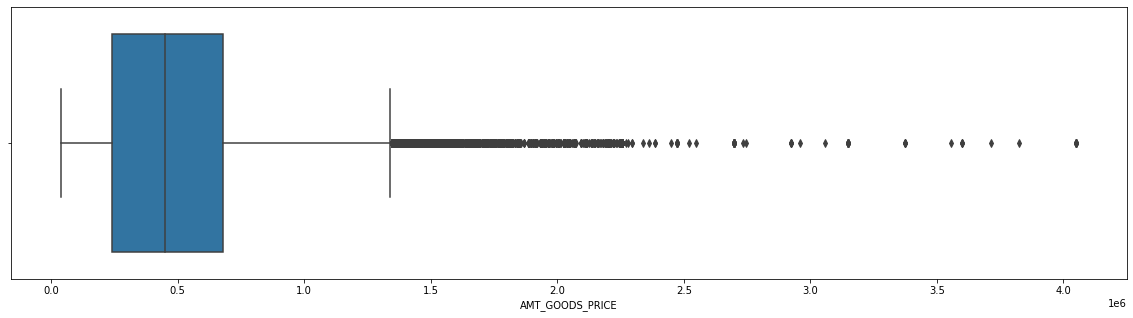

In [42]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['AMT_GOODS_PRICE'])
plt.show()

In [43]:
# SK_ID_CURR

final_app_data['SK_ID_CURR'].describe()

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64

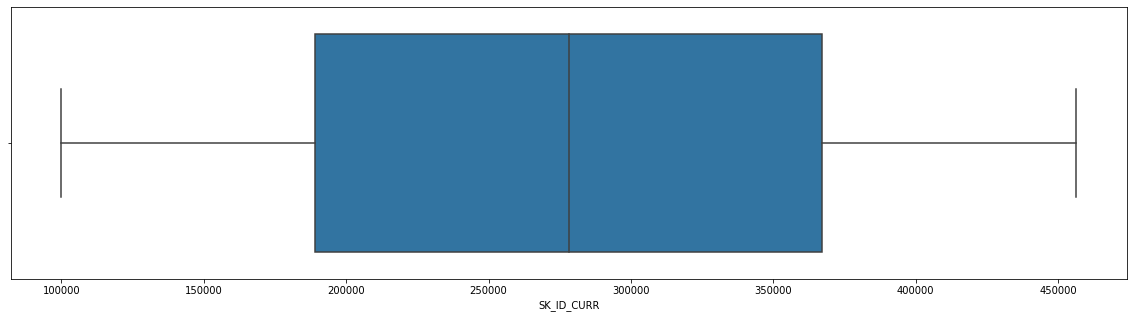

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['SK_ID_CURR'])
plt.show()

In [45]:
# TARGET

final_app_data['TARGET'].describe()

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

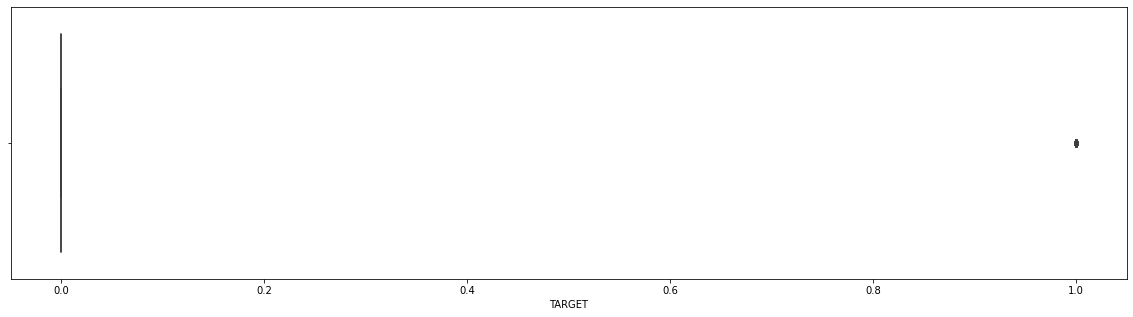

In [46]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['TARGET'])
plt.show()

In [47]:
# CNT_CHILDREN

final_app_data['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

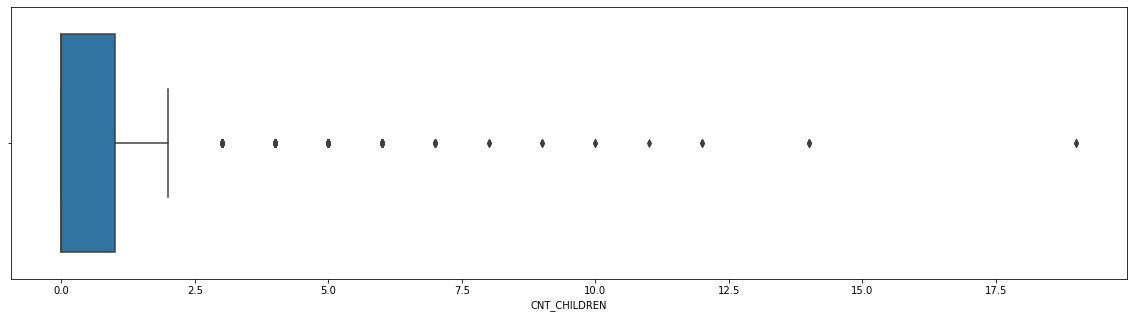

In [48]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['CNT_CHILDREN'])
plt.show()

In [49]:
# DAYS_EMPLOYED

final_app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

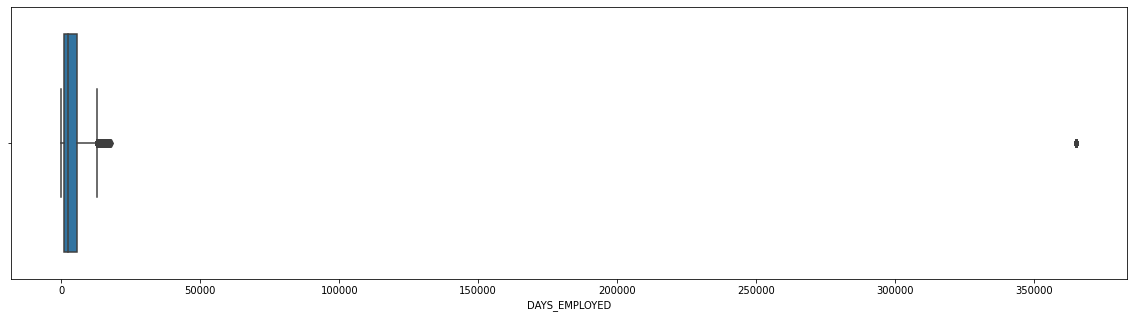

In [50]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['DAYS_EMPLOYED'])
plt.show()

In [51]:
# FLAG_CNT_MOBILE

final_app_data['FLAG_CONT_MOBILE'].describe()

count    307511.000000
mean          0.998133
std           0.043164
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: FLAG_CONT_MOBILE, dtype: float64

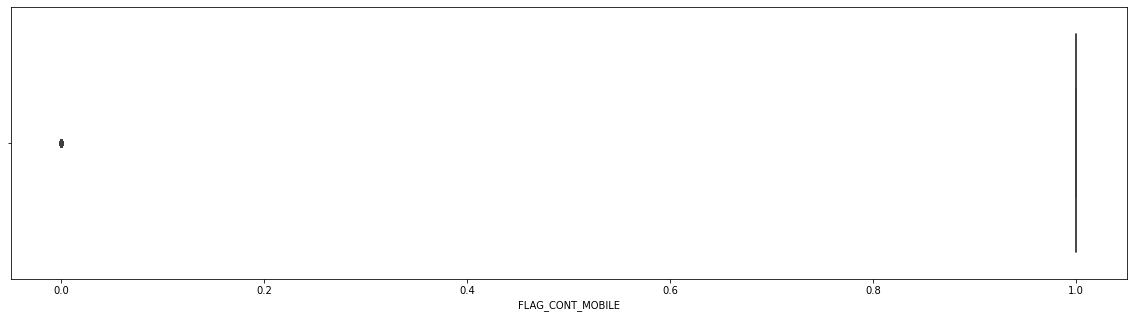

In [52]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['FLAG_CONT_MOBILE'])
plt.show()

In [53]:
# FLAG_EMAIL

final_app_data['FLAG_EMAIL'].describe()

count    307511.000000
mean          0.056720
std           0.231307
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_EMAIL, dtype: float64

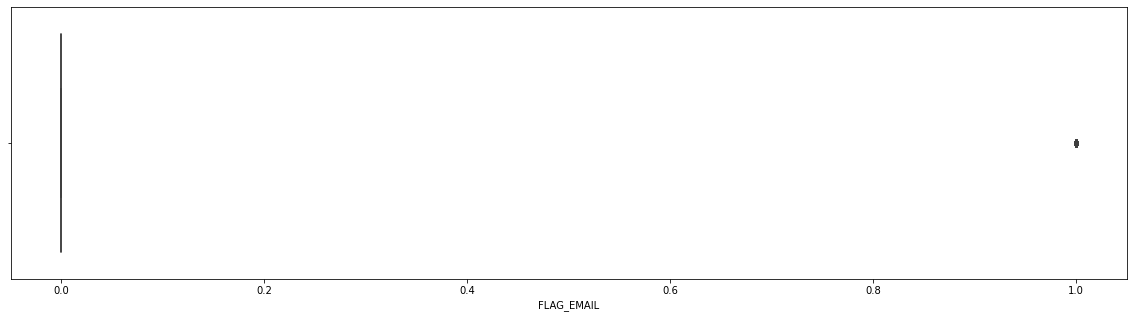

In [54]:
plt.figure(figsize=(20,5))
sns.boxplot(final_app_data['FLAG_EMAIL'])
plt.show()

In [55]:
# NAME_INCOME_TYPE

final_app_data['NAME_INCOME_TYPE'].describe()

count      307511
unique          8
top       Working
freq       158774
Name: NAME_INCOME_TYPE, dtype: object

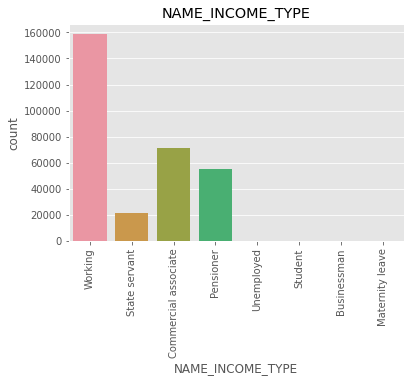

In [89]:
plt.style.use('ggplot')
plt.title('NAME_INCOME_TYPE')
pt=sns.countplot(final_app_data['NAME_INCOME_TYPE'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [56]:
# NAME_FAMILY_STATUS

final_app_data['NAME_FAMILY_STATUS'].describe()

count      307511
unique          6
top       Married
freq       196432
Name: NAME_FAMILY_STATUS, dtype: object

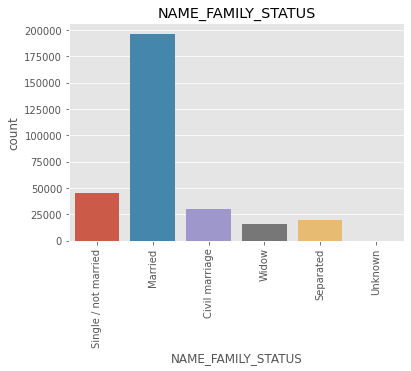

In [88]:
plt.style.use('ggplot')
plt.title('NAME_FAMILY_STATUS')
pt=sns.countplot(final_app_data['NAME_FAMILY_STATUS'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [57]:
# OCCUPATION_TYPE

final_app_data['OCCUPATION_TYPE'].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

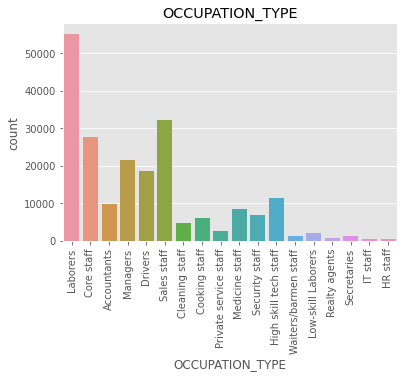

In [87]:
plt.style.use('ggplot')
plt.title('OCCUPATION_TYPE')
pt=sns.countplot(final_app_data['OCCUPATION_TYPE'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [58]:
# ORGANIZATION_TYPE

final_app_data['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

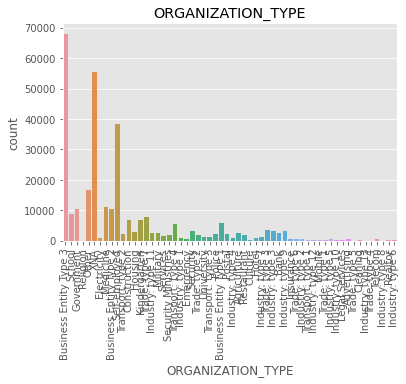

<Figure size 576x288 with 0 Axes>

In [93]:
plt.style.use('ggplot')
plt.title('ORGANIZATION_TYPE')
pt=sns.countplot(final_app_data['ORGANIZATION_TYPE'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.figure(figsize=(8,4))
plt.show()

 >>**Now Analysing final_pre_data**

In [59]:
final_pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [60]:
# AMT_ANNUITY

final_pre_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

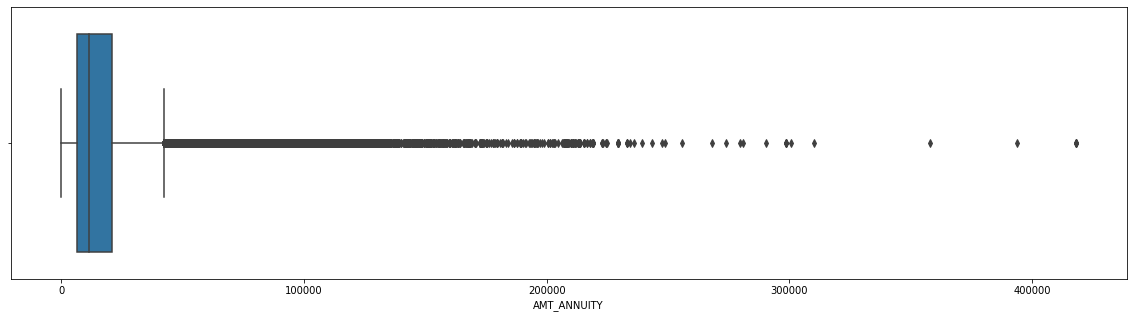

In [61]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['AMT_ANNUITY'])
plt.show()

In [62]:
# AMT_APPLICATION

final_pre_data['AMT_APPLICATION'].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

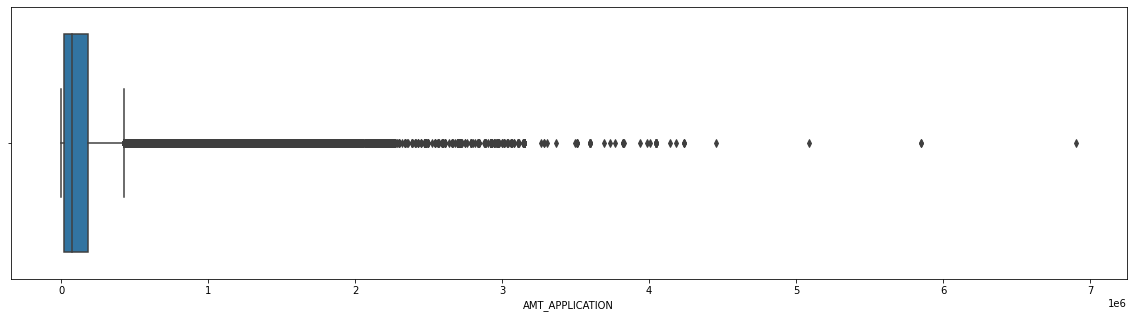

In [63]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['AMT_APPLICATION'])
plt.show()

In [77]:
# AMT_CREDIT

final_pre_data['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

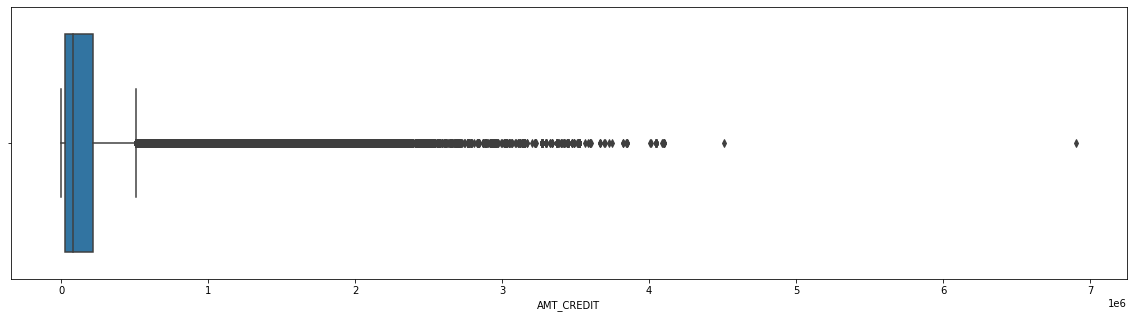

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['AMT_CREDIT'])
plt.show()

In [65]:
# AMT_GOODS_PRICE

final_pre_data['AMT_GOODS_PRICE']

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64

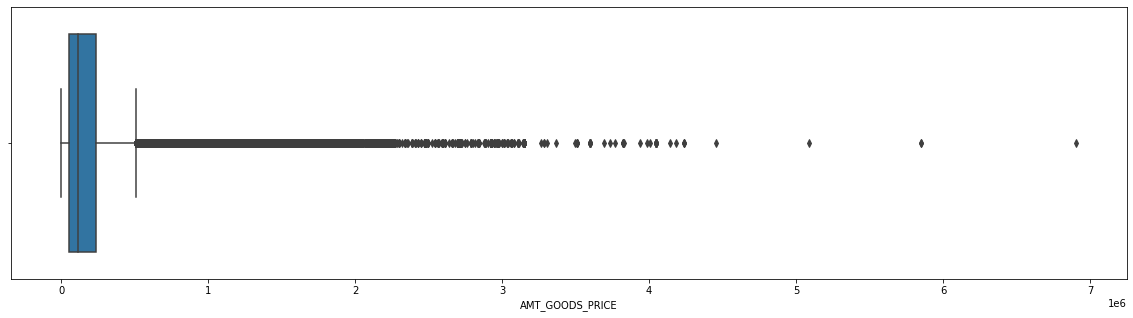

In [66]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['AMT_GOODS_PRICE'])
plt.show()

In [67]:
# CNT_PAYMENT

final_pre_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

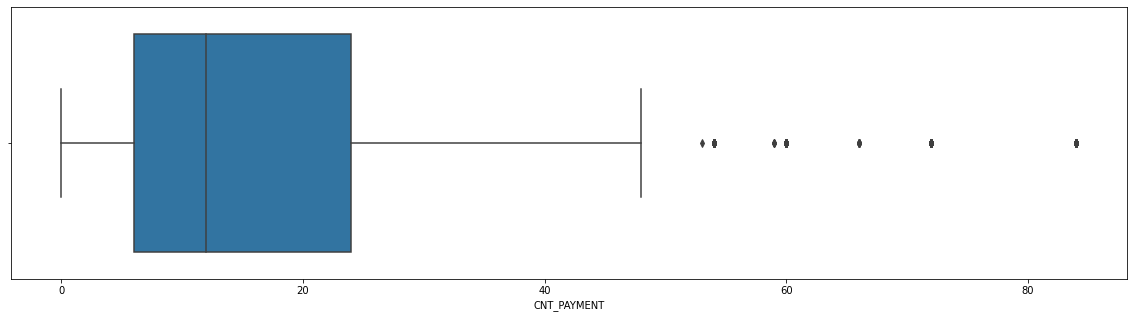

In [68]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['CNT_PAYMENT'])
plt.show()

In [69]:
# SK_ID_PREV

final_pre_data['SK_ID_PREV'].describe()

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64

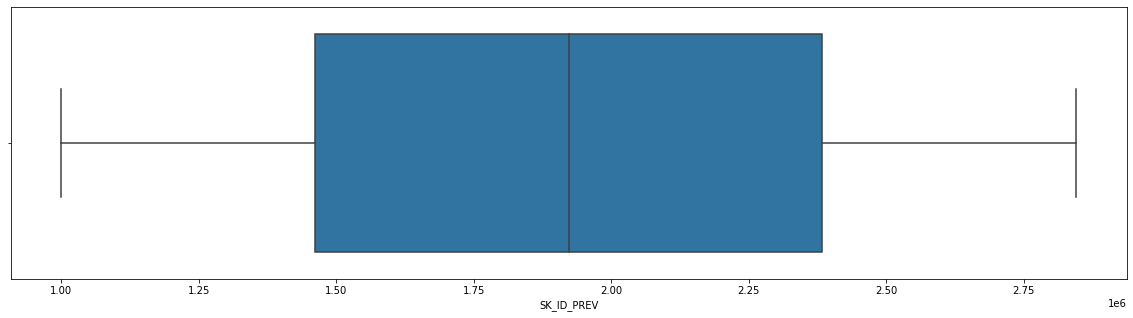

In [70]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['SK_ID_PREV'])
plt.show()

In [71]:
# SK_ID_CURR

final_pre_data['SK_ID_CURR'].describe()

count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

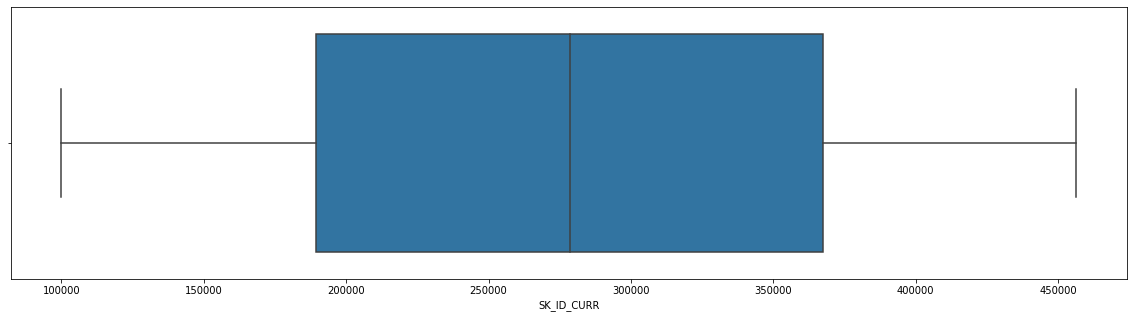

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(final_pre_data['SK_ID_CURR'])
plt.show()

In [73]:
# NAME_LOAN_PURPOSE

final_pre_data['NAME_CASH_LOAN_PURPOSE'].describe()

count     1670214
unique         25
top           XAP
freq       922661
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

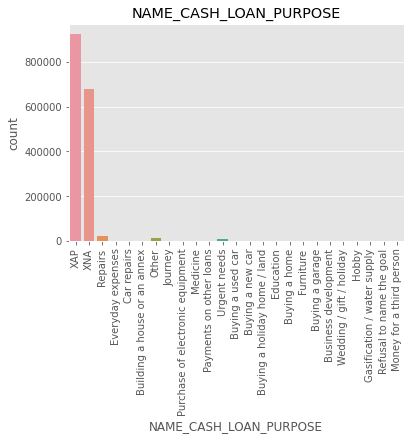

In [82]:
plt.style.use('ggplot')
plt.title('NAME_CASH_LOAN_PURPOSE')
pt=sns.countplot(final_pre_data['NAME_CASH_LOAN_PURPOSE'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [74]:
# NAME_GOODS_CATEGORY

final_pre_data['NAME_GOODS_CATEGORY'].describe()

count     1670214
unique         28
top           XNA
freq       950809
Name: NAME_GOODS_CATEGORY, dtype: object

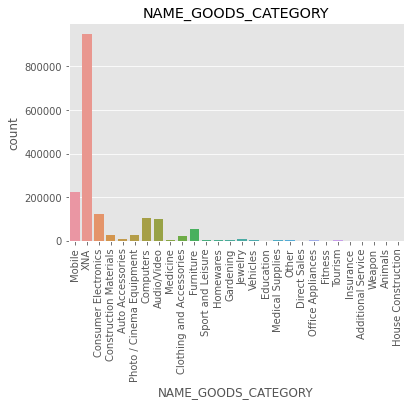

In [83]:
plt.style.use('ggplot')
plt.title('NAME_GOODS_CATEGORY')
pt=sns.countplot(final_pre_data['NAME_GOODS_CATEGORY'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [75]:
# NAME_PORTFOLIO

final_pre_data['NAME_PORTFOLIO'].describe()

count     1670214
unique          5
top           POS
freq       691011
Name: NAME_PORTFOLIO, dtype: object

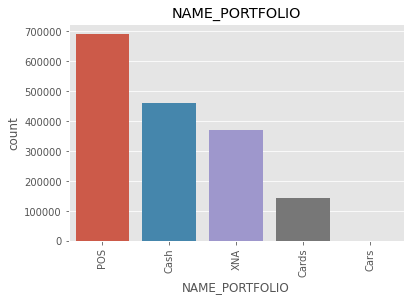

In [84]:
plt.style.use('ggplot')
plt.title('NAME_PORTFOLIO')
pt=sns.countplot(final_pre_data['NAME_PORTFOLIO'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

# **MERGING final_app_data and final_pre_data**

In [76]:
extra_feature=[]
common_feature=[]


for col in final_app_data.columns:
  if col not in final_pre_data.columns:
    extra_feature.append(col)
  
  else:
    common_feature.append(col)

print(len(extra_feature))
print(len(common_feature))
print(common_feature)

66
7
['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']


In [94]:
merged_1=final_app_data[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']]

In [96]:
merged_2=final_pre_data[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']]

In [95]:
merged_1.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,100002,Cash loans,406597.5,24700.5,351000.0,WEDNESDAY,10
1,100003,Cash loans,1293502.5,35698.5,1129500.0,MONDAY,11
2,100004,Revolving loans,135000.0,6750.0,135000.0,MONDAY,9
3,100006,Cash loans,312682.5,29686.5,297000.0,WEDNESDAY,17
4,100007,Cash loans,513000.0,21865.5,513000.0,THURSDAY,11


In [97]:
merged_2.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START
0,271877,Consumer loans,17145.0,1730.430,17145.0,SATURDAY,15
1,108129,Cash loans,679671.0,25188.615,607500.0,THURSDAY,11
2,122040,Cash loans,136444.5,15060.735,112500.0,TUESDAY,11
3,176158,Cash loans,470790.0,47041.335,450000.0,MONDAY,7
4,202054,Cash loans,404055.0,31924.395,337500.0,THURSDAY,9


In [98]:
data_merged=pd.concat([merged_1,merged_2],ignore_index=True,sort=False)

In [104]:
data_merged.head()
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977725 entries, 0 to 1977724
Data columns (total 7 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_CURR                  int64  
 1   NAME_CONTRACT_TYPE          object 
 2   AMT_CREDIT                  float64
 3   AMT_ANNUITY                 float64
 4   AMT_GOODS_PRICE             float64
 5   WEEKDAY_APPR_PROCESS_START  object 
 6   HOUR_APPR_PROCESS_START     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 105.6+ MB


In [105]:
# SK_ID_CURR

data_merged['SK_ID_CURR'].describe()

count    1.977725e+06
mean     2.783297e+05
std      1.028110e+05
min      1.000010e+05
25%      1.893000e+05
50%      2.786350e+05
75%      3.674530e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

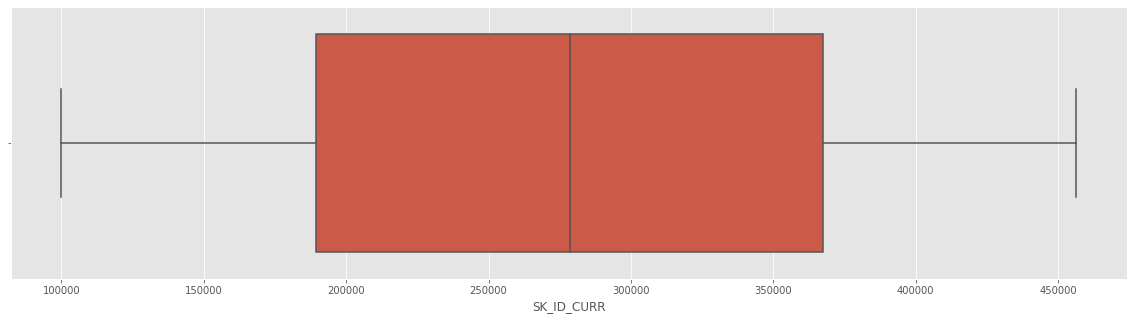

In [106]:
plt.figure(figsize=(20,5))
sns.boxplot(data_merged['SK_ID_CURR'])
plt.show()

In [107]:
# ATM_CREDIT

data_merged['AMT_CREDIT'].describe()

count    1.977724e+06
mean     2.587617e+05
std      3.636136e+05
min      0.000000e+00
25%      3.298500e+04
50%      1.112310e+05
75%      3.232395e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

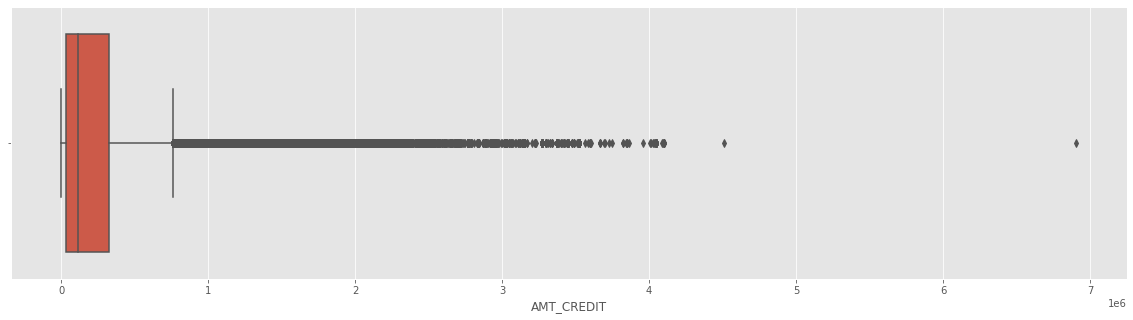

In [108]:
plt.figure(figsize=(20,5))
sns.boxplot(data_merged['AMT_CREDIT'])
plt.show()

In [109]:
# AMT_ANNUITY

data_merged['AMT_ANNUITY'].describe()

count    1.605478e+06
mean     1.809135e+04
std      1.536741e+04
min      0.000000e+00
25%      7.173675e+03
50%      1.344001e+04
75%      2.457742e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

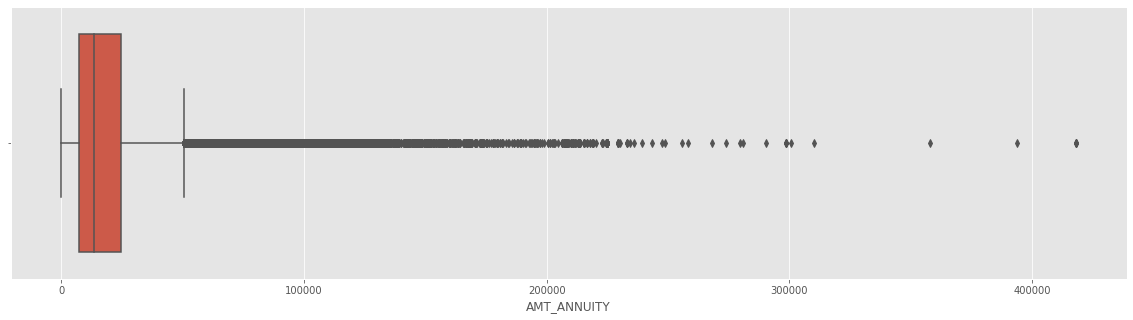

In [110]:
plt.figure(figsize=(20,5))
sns.boxplot(data_merged['AMT_ANNUITY'])
plt.show()

In [111]:
# AMT_GOODS_PRICE

data_merged['AMT_GOODS_PRICE'].describe()

count    1.591932e+06
mean     2.877813e+05
std      3.487679e+05
min      0.000000e+00
25%      6.363000e+04
50%      1.398301e+05
75%      4.003787e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

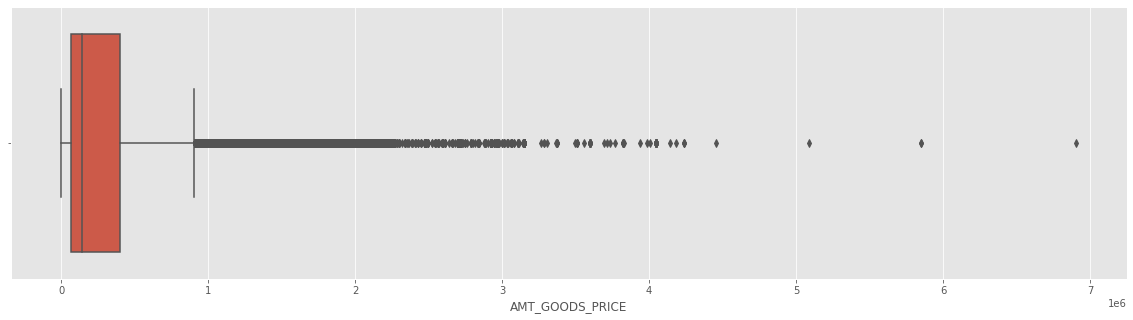

In [112]:
plt.figure(figsize=(20,5))
sns.boxplot(data_merged['AMT_GOODS_PRICE'])
plt.show()

In [113]:
# NAME_CONTRACT_TYPE

data_merged['NAME_CONTRACT_TYPE'].describe()

count        1977725
unique             4
top       Cash loans
freq         1025785
Name: NAME_CONTRACT_TYPE, dtype: object

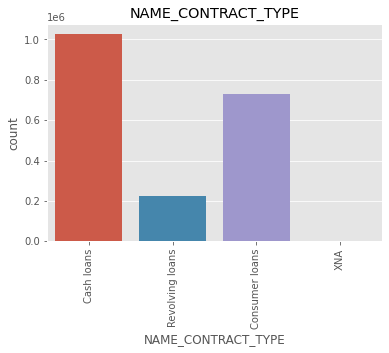

In [116]:
plt.style.use('ggplot')
plt.title('NAME_CONTRACT_TYPE')
pt=sns.countplot(data_merged['NAME_CONTRACT_TYPE'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [114]:
# WEEKDAY_APPR_PROCESS_START

data_merged['WEEKDAY_APPR_PROCESS_START'].describe()

count     1977725
unique          7
top       TUESDAY
freq       309019
Name: WEEKDAY_APPR_PROCESS_START, dtype: object

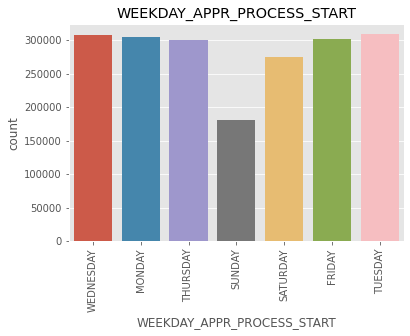

In [120]:
plt.style.use('ggplot')
plt.title('WEEKDAY_APPR_PROCESS_START')
pt=sns.countplot(data_merged['WEEKDAY_APPR_PROCESS_START'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

In [115]:
# HOUR_APPR_PROCESS_START

data_merged['HOUR_APPR_PROCESS_START']

0          10
1          11
2           9
3          17
4          11
           ..
1977720    12
1977721    15
1977722    12
1977723     9
1977724    10
Name: HOUR_APPR_PROCESS_START, Length: 1977725, dtype: int64

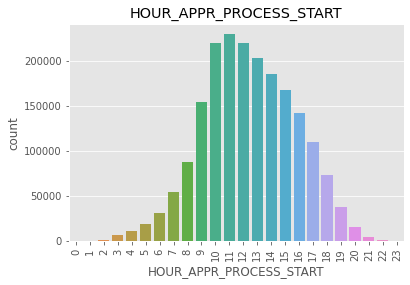

In [121]:
plt.style.use('ggplot')
plt.title('HOUR_APPR_PROCESS_START')
pt=sns.countplot(data_merged['HOUR_APPR_PROCESS_START'])
pt.set_xticklabels(pt.get_xticklabels(),rotation=90)
plt.show()

# **DATA INBALANCE**

In [156]:
from locale import normalize
final_app_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

**key points**

* non-defulter are 91.9%
*defulter are 8.1%


# **UNIVARIATE ANALYSIS**

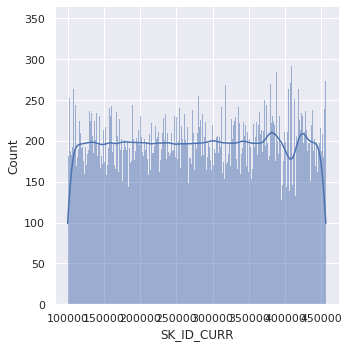

In [143]:
# SK_ID_CURR

sns.set(rc={'figure.figsize':(12,8)})
sns.displot(data_merged['SK_ID_CURR'],kde=True,bins=10000)

plt.show()

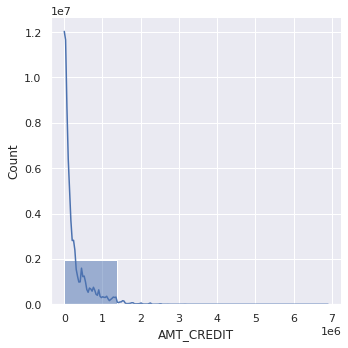

In [147]:
# AMT_CREDIT

sns.set(rc={'figure.figsize':(12,8)})
sns.displot(data_merged['AMT_CREDIT'],kde=True,bins=5)

plt.show()

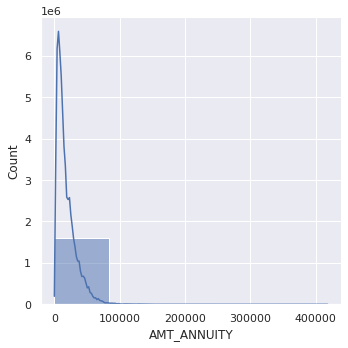

In [152]:
# AMT_ANNUITY

sns.set(rc={'figure.figsize':(12,8)})
sns.displot(data_merged['AMT_ANNUITY'],kde=True,bins=5)

plt.show()

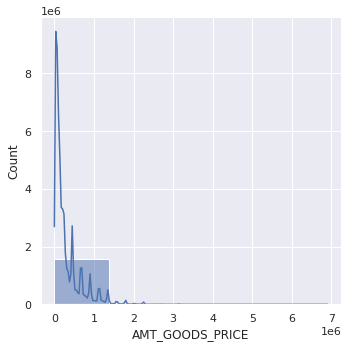

In [151]:
# AMT_GOODS_PRICE

sns.set(rc={'figure.figsize':(12,8)})
sns.displot(data_merged['AMT_GOODS_PRICE'],kde=True,bins=5)

plt.show()

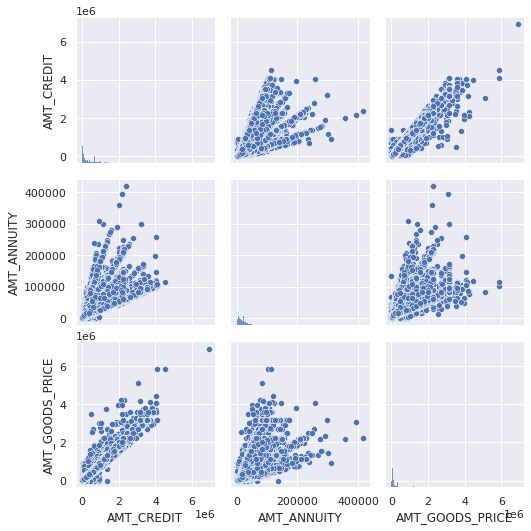

In [154]:
AMT=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.pairplot(data_merged[AMT])
plt.show()

**Recommendation**


*	From the data imbalance we get that only 8.1% on the previous data have defaulted and rest 91.9% have not defaulted.

* The data was imbalance on higher level.
* With the help of univariate and bivariate analysis we see that there are few important columns which give us clear idea about the data such as NAME_INCOME_TYPE,AMT_ANNUITY,TARGET,SK_ID_CURR etc.

* As there was 121,73 columns (~40%) of the columns have missing values.
*	We have analysed the outliers and handled it to get out relative required information.
* The data consists of numeric and categorical columns through which we get information.
